In [16]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [2]:
df = pd.read_excel('iris_data.xlsx')
df.head()

,SL,SW,PL,PW,TYPE
0,5.0,3.3,1.4,0.2,SETOSA
1,6.4,2.8,5.6,2.2,VIRGINIC
2,6.5,2.8,4.6,1.5,VERSICOL
3,6.7,3.1,5.6,2.4,VIRGINIC
4,6.3,2.8,5.1,1.5,VIRGINIC


In [21]:
#create a classification model for iris dataset
def model_noSpecie(df):

    #define train and test sets where SL is the input and SW is the output
    X = df[["SW", "PL", "PW"]]
    Y = df["SL"]
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    #create the model
    model = LinearRegression()

    #fit the model
    model.fit(X_train, Y_train)

    #predict the model
    Y_pred = model.predict(X_test)

    #calculate the error
    error = mean_absolute_error(Y_test, Y_pred)
    print('Error without type of iris: ', error)

    return model, error, Y_pred, Y_test

def model_withSpecie(df):

    #discretize data of type column
    df["TYPE"] = pd.Categorical(df["TYPE"]).codes

    #define train and test sets where SL is the input and SW is the output
    X = df[["SW", "PL", "PW", "TYPE"]]
    Y = df["SL"]
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    #create the model
    model = LinearRegression()

    #fit the model
    model.fit(X_train, Y_train)

    #predict the model
    Y_pred = model.predict(X_test)

    #calculate the error
    error = mean_absolute_error(Y_test, Y_pred)
    print('Error with type of iris: ', error)

    return model, error, Y_pred, Y_test

In [22]:
mdl_noSpc, error_noSpc, Y_pred_noSpc, Y_test_noSpc = model_noSpecie(df)
mdl_withSpc, error_withSpc, Y_pred_withSpc, Y_test_withSpc = model_withSpecie(df)

Error without type of iris:  0.24823680231851655
Error with type of iris:  0.2692582452723105


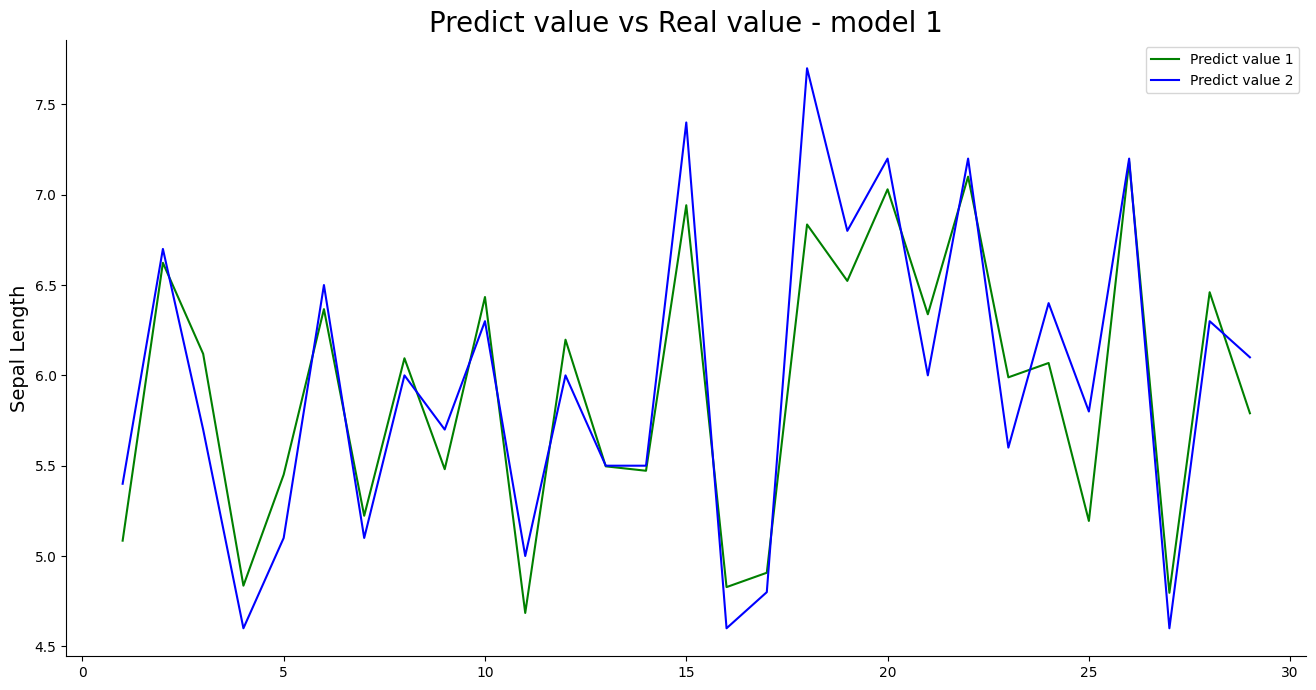

In [23]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np

rcParams['figure.figsize'] = (16, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

plt.plot(np.arange(1, len(Y_pred_noSpc)+1), Y_pred_noSpc, color='green', label='Predict value 1')
plt.plot(np.arange(1, len(Y_pred_noSpc)+1), Y_test_noSpc, color='blue', label='Predict value 2')
plt.title('Predict value vs Real value - model 1', size=20)
plt.ylabel('Sepal Length', size=14)
plt.legend();

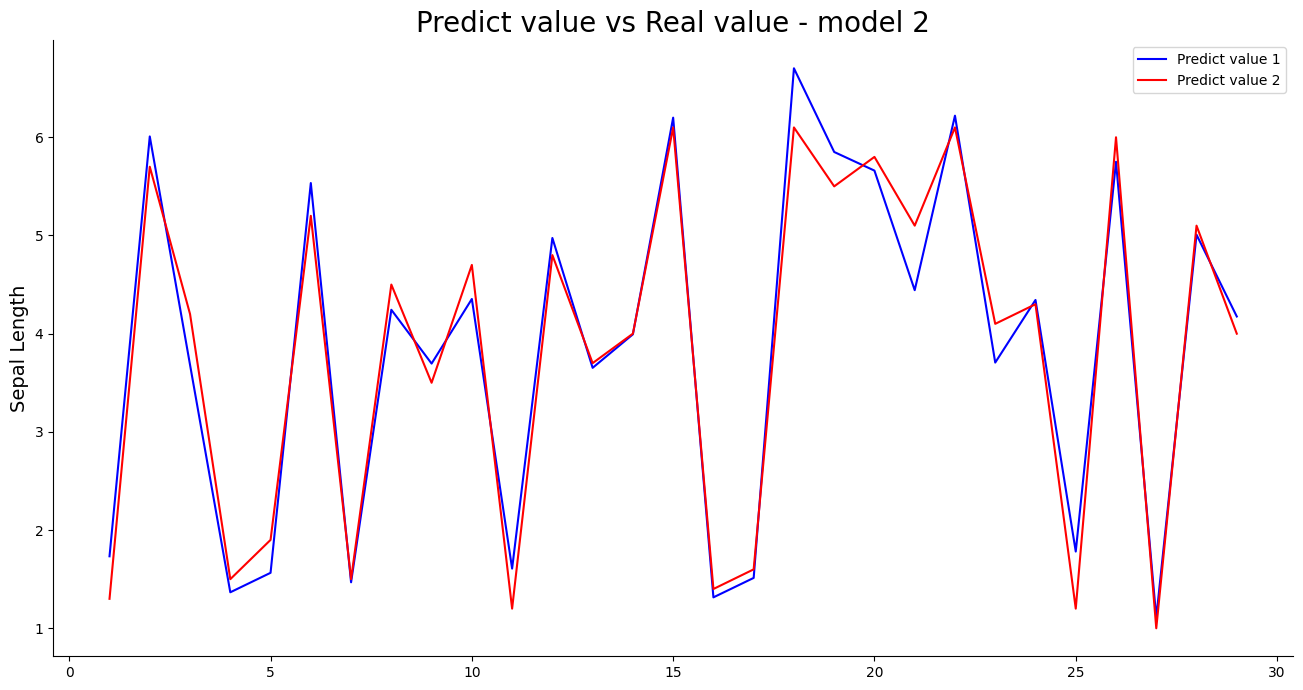

In [13]:
plt.plot(np.arange(1, len(Y_pred_noSpc)+1), Y_pred_withSpc, color='blue', label='Predict value 1')
plt.plot(np.arange(1, len(Y_pred_noSpc)+1), Y_test_withSpc, color='red', label='Predict value 2')
plt.title('Predict value vs Real value - model 2', size=20)
plt.ylabel('Sepal Length', size=14)
plt.legend();